# Bank Loan Defaulter Risk Analysis — Exploratory Data Analysis (EDA)

**Purpose**

> This notebook performs an end-to-end exploratory data analysis (EDA) on loan application datasets to identify patterns, data quality issues, and features that help assess borrower default risk.

**What you'll find in this notebook**

- A brief dataset overview and schema (data types, sizes).
- Missing value analysis with clear visualizations and thresholds.
- Clean-up steps (drop high-missing columns, remove duplicates, impute missing values).
- Core visual analyses: target distribution, numeric distributions, categorical breakdowns, and correlation/feature relationships.
- Small actionable notes on next steps for modeling (feature engineering and selection).

**How to use this notebook**

1. Run the cells in order — imports, data loading, then analysis.  
2. If you change a dataset file, re-run the data-loading cell and downstream cells (or restart kernel).  
3. Visual cells are sized for readability — expand figures if needed in your viewer.  

** Expected outputs**

- Summary tables showing missing counts and types.
- Bar/heatmap charts exposing data problems and key patterns.
- Cleaned datasets (in-memory) ready for feature work.

## 1. Introduction

**Objective**

Analyze current and historical loan application records to surface patterns associated with loan default risk. This EDA focuses on data quality, exploratory visualizations, and simple cleaning steps so the resulting datasets are ready for modeling and feature engineering.

**Datasets used**

- `application_data.csv` — current loan application records (applicant demographics, financials, application details).
- `previous_application.csv` — historical loan/credit applications by the same applicants (useful to derive behavioral features).
- `columns_description.csv` — metadata describing each column (use this when you need definitions or to cross-check potential encodings).

**Quick checks to run before you start**

1. Make sure the three CSV files are in the same folder as this notebook.
2. Run the imports cell (Section 2) to load plotting and data libraries.
3. Run the data-loading cell (Section 3) and confirm shapes printed for each dataset.

**Reading tips**

- Look first at the missing-value summary (Section 4.2) to identify noisy columns.
- The notebook marks columns with >40% missing as candidates for removal; you can change the threshold if you want to be more/less aggressive.
- Visual sections include both raw and cleaned-data plots so you can see the effect of cleaning steps.

## 2. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Load the Datasets

In [24]:
app = pd.read_csv("application_data.csv")
prev = pd.read_csv("previous_application.csv")
desc = pd.read_csv("columns_description.csv")

# Display dataset info
print("Dataset Shapes:")
print(" - application_data:", app.shape)
print(" - previous_application:", prev.shape)
print(" - columns_description:", desc.shape)

# Quick preview
display(app.head())
display(prev.head())
display(desc.head(15))

Dataset Shapes:
 - application_data: (307511, 122)
 - previous_application: (1670214, 37)
 - columns_description: (160, 5)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


## 4. Dataset Overview

This section provides a high-level look at the datasets, their schemas, and the data-quality checks we perform before moving to analysis and modeling.

It is divided into four sub-sections:

- 4.1 Data Types and Summary — quick schema (data types) and row/column counts to understand dataset shape.
- 4.2 Missing Value Analysis — a tabular summary that shows how many values are missing per column and the missing percentage.
- 4.3 Missing Value Analysis (Visual Representation) — bar charts that visualize missingness and help identify problematic features quickly.
- 4.4 Dropping Columns (Missing Values more than 40%) — a recommended, repeatable step to remove columns with excessive missingness; explanation and alternatives are included.

### 4.1 Data Types and Summary

Purpose: Confirm the structure of each dataset (which columns are numeric vs categorical), identify obvious type issues, and check row/column counts before deeper analysis.

What this cell does

- Prints `DataFrame.info()` for both datasets so you can see the dtype of each column and the non-null counts.
- Use the output to spot:
  - Columns that are numeric but encoded as objects (may need conversion).
  - Columns with many missing values (non-null counts far below the total).

How to interpret

- If a numeric column has object dtype, inspect a few unique values to decide whether to convert (e.g., remove commas/currency symbols).
- If many rows are missing in a single column, consider whether the column is informative or noisy before spending time imputing it.

In [21]:
# Data types and counts
print("\nApplication Data Info:")
app.info()

print("\nPrevious Application Data Info:")
prev.info()


Application Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB

Previous Application Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROC

### 4.2 Missing Value Analysis

**Purpose**: Quantify missingness per column and prioritize columns for inspection or removal.

**What to expect from the `missing_summary` table**

- `Non-Null Count`: number of present (non-missing) values per column.
- `Missing Count`: absolute number of missing entries.
- `Missing %`: percentage of missing values (useful for quick thresholding).
- `Data Type`: column dtype to help decide imputation approach.



In [25]:

def missing_summary(df, name):
    miss = df.isnull().sum()
    miss_pct = (miss / len(df) * 100).round(2)
    out = pd.DataFrame({
        "Non-Null Count": df.count(),
        "Missing Count": miss,
        "Missing %": miss_pct,
        "Data Type": df.dtypes.astype(str)
    }).sort_values("Missing %", ascending=False)
    display(out.head(25))
    return out

app_miss = missing_summary(app, "Application Data")
prev_miss = missing_summary(prev, "Previous Application")


,Non-Null Count,Missing Count,Missing %,Data Type
COMMONAREA_AVG,92646,214865,69.87,float64
COMMONAREA_MODE,92646,214865,69.87,float64
COMMONAREA_MEDI,92646,214865,69.87,float64
NONLIVINGAPARTMENTS_MEDI,93997,213514,69.43,float64
NONLIVINGAPARTMENTS_MODE,93997,213514,69.43,float64
NONLIVINGAPARTMENTS_AVG,93997,213514,69.43,float64
FONDKAPREMONT_MODE,97216,210295,68.39,object
LIVINGAPARTMENTS_AVG,97312,210199,68.35,float64
LIVINGAPARTMENTS_MEDI,97312,210199,68.35,float64
LIVINGAPARTMENTS_MODE,97312,210199,68.35,float64


,Non-Null Count,Missing Count,Missing %,Data Type
RATE_INTEREST_PRIVILEGED,5951,1664263,99.64,float64
RATE_INTEREST_PRIMARY,5951,1664263,99.64,float64
AMT_DOWN_PAYMENT,774370,895844,53.64,float64
RATE_DOWN_PAYMENT,774370,895844,53.64,float64
NAME_TYPE_SUITE,849809,820405,49.12,object
DAYS_TERMINATION,997149,673065,40.30,float64
DAYS_FIRST_DRAWING,997149,673065,40.30,float64
DAYS_FIRST_DUE,997149,673065,40.30,float64
DAYS_LAST_DUE_1ST_VERSION,997149,673065,40.30,float64
DAYS_LAST_DUE,997149,673065,40.30,float64


### 4.3 Missing Value Analysis (Visual Representation)

Purpose: Provide quick visual signals about which columns are most affected by missing values so you can make informed cleaning decisions.

Plot behaviour in this notebook

- We draw two focused bar charts per dataset:
  1. Columns with > 40% missing values (highlighted in red) — these are strong candidates for removal or heavy rework.
  2. Columns with ≤ 40% but > 0% missing values (shown in blue) — good candidates for imputation or more nuanced handling.

Why 40%?

- The 40% threshold is a pragmatic balance: columns with more than 40% missing often require strong assumptions to impute and may not justify the risk of introducing bias. Adjust the threshold depending on model tolerance and domain knowledge.

How to read the plots

- Longer bars (to the right) indicate larger percentages of missing data.
- Use the red-chart first to identify columns to drop or re-examine in `columns_description.csv` for meaning; use the blue-chart to plan imputation strategies.

C:\Users\Jiban Hussain\AppData\Local\Temp\ipykernel_11976\4159502696.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_pct.values, y=missing_pct.index, palette="viridis")


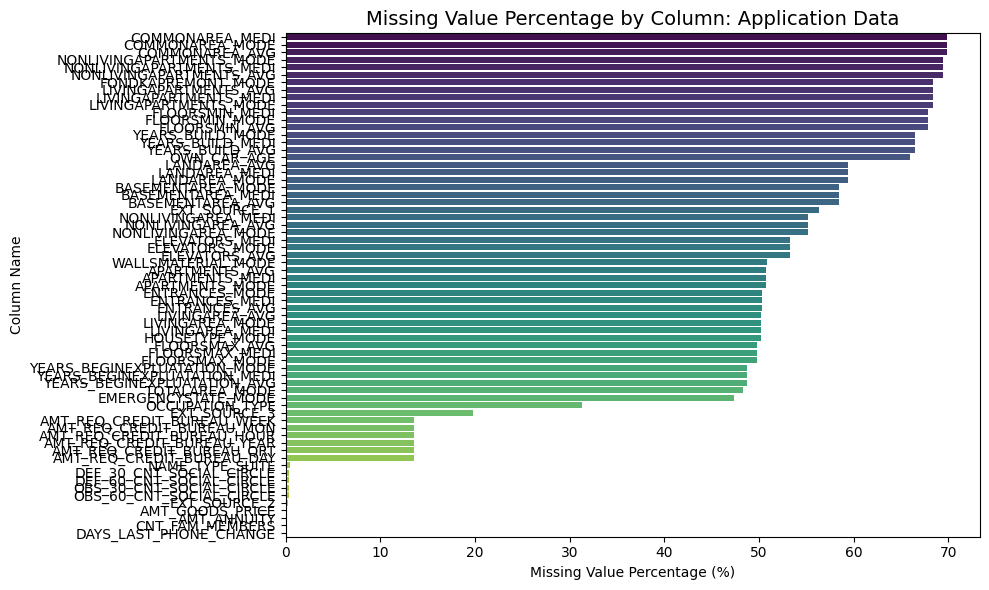

C:\Users\Jiban Hussain\AppData\Local\Temp\ipykernel_11976\4159502696.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_pct.values, y=missing_pct.index, palette="viridis")


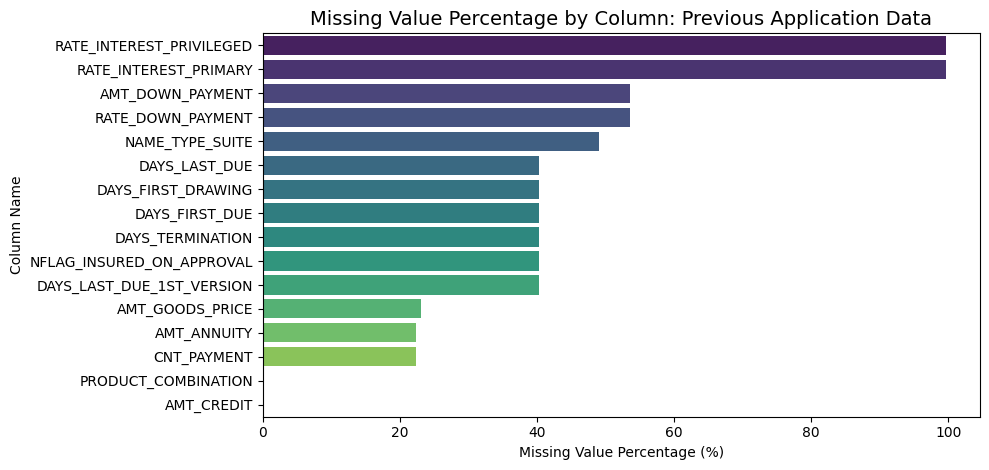

In [5]:
# Visualize missing values for Application and Previous Application datasets

def visualize_missing_values(df, title):
    missing_pct = df.isnull().mean() * 100
    missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)
    if missing_pct.empty:
        print(f"No missing values in {title}.")
        return
    plt.figure(figsize=(10, min(6, len(missing_pct) * 0.3)))
    sns.barplot(x=missing_pct.values, y=missing_pct.index, palette="viridis")
    plt.title(f"Missing Value Percentage by Column: {title}", fontsize=14)
    plt.xlabel("Missing Value Percentage (%)")
    plt.ylabel("Column Name")
    plt.tight_layout()
    plt.show()

visualize_missing_values(app, "Application Data")
visualize_missing_values(prev, "Previous Application Data")


Application Data - Columns with >40% missing values: 49


C:\Users\Jiban Hussain\AppData\Local\Temp\ipykernel_11976\1580582760.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=above_thresh.values, y=above_thresh.index, palette="Reds_r")


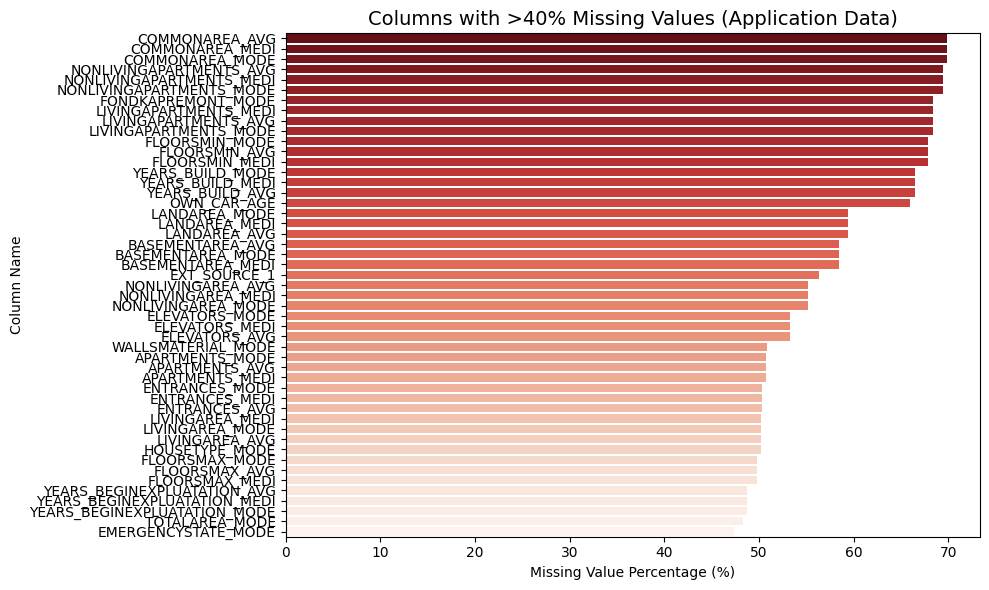


Application Data - Columns with ≤40% missing values: 18


C:\Users\Jiban Hussain\AppData\Local\Temp\ipykernel_11976\1580582760.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=below_thresh.values, y=below_thresh.index, palette="Blues_r")


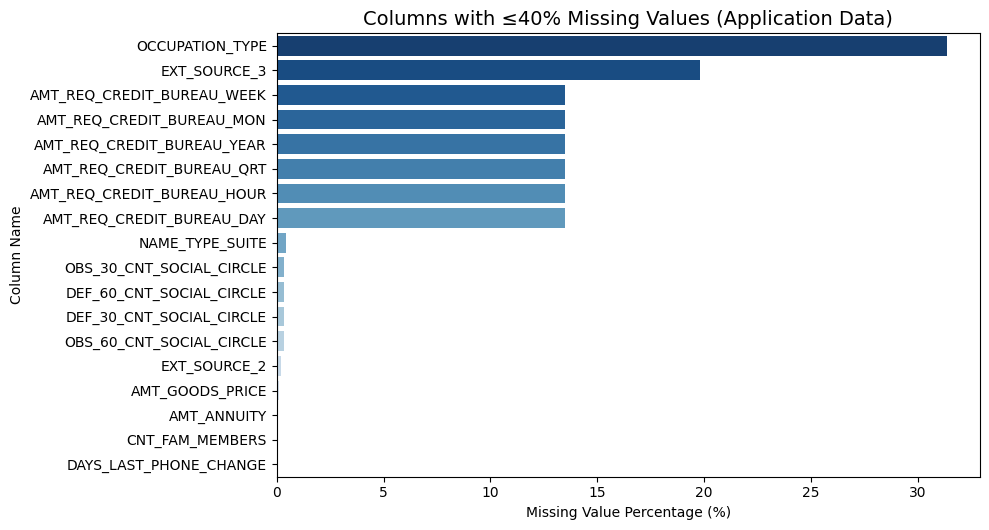


Previous Application Data - Columns with >40% missing values: 11


C:\Users\Jiban Hussain\AppData\Local\Temp\ipykernel_11976\1580582760.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=above_thresh.values, y=above_thresh.index, palette="Reds_r")


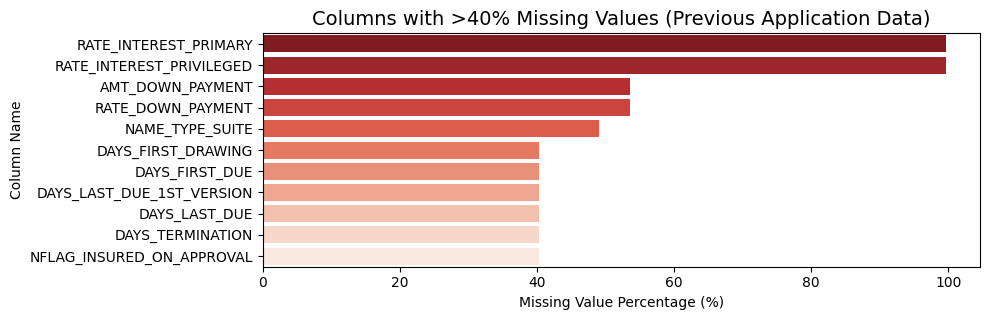


Previous Application Data - Columns with ≤40% missing values: 5


C:\Users\Jiban Hussain\AppData\Local\Temp\ipykernel_11976\1580582760.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=below_thresh.values, y=below_thresh.index, palette="Blues_r")


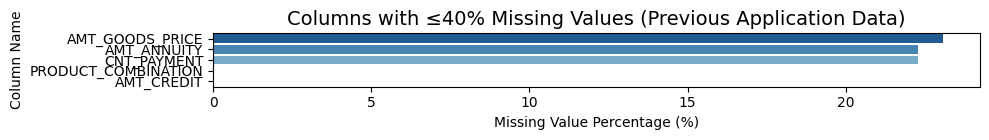

In [6]:
# Visualize columns with >40% and <=40% missing values for both datasets

def plot_missing_by_threshold(df, title, threshold=40):
    missing_pct = df.isnull().mean() * 100
    above_thresh = missing_pct[missing_pct > threshold].sort_values(ascending=False)
    below_thresh = missing_pct[(missing_pct > 0) & (missing_pct <= threshold)].sort_values(ascending=False)
    
    print(f"\n{title} - Columns with >{threshold}% missing values: {len(above_thresh)}")
    if not above_thresh.empty:
        plt.figure(figsize=(10, min(6, len(above_thresh) * 0.3)))
        sns.barplot(x=above_thresh.values, y=above_thresh.index, palette="Reds_r")
        plt.title(f"Columns with >{threshold}% Missing Values ({title})", fontsize=14)
        plt.xlabel("Missing Value Percentage (%)")
        plt.ylabel("Column Name")
        plt.tight_layout()
        plt.show()
    else:
        print(f"No columns with >{threshold}% missing values in {title}.")
    
    print(f"\n{title} - Columns with ≤{threshold}% missing values: {len(below_thresh)}")
    if not below_thresh.empty:
        plt.figure(figsize=(10, min(6, len(below_thresh) * 0.3)))
        sns.barplot(x=below_thresh.values, y=below_thresh.index, palette="Blues_r")
        plt.title(f"Columns with ≤{threshold}% Missing Values ({title})", fontsize=14)
        plt.xlabel("Missing Value Percentage (%)")
        plt.ylabel("Column Name")
        plt.tight_layout()
        plt.show()
    else:
        print(f"No columns with ≤{threshold}% missing values in {title}.")

plot_missing_by_threshold(app, "Application Data", threshold=40)
plot_missing_by_threshold(prev, "Previous Application Data", threshold=40)

### 4.4 Dropping Columns (More than 40% Missing Values)

Purpose: remove features that contain an excessive proportion of missing values so downstream analysis and models are not unduly affected by noisy or sparsely populated columns.

Why a threshold?:

- Columns with very high missingness (commonly >40%) often require strong, unverifiable assumptions for imputation and may add more noise than signal.
- The 40% value is a pragmatic default — adjust it based on domain knowledge, the size of your dataset, and how important a particular column is for modeling.

Recommended workflow before dropping:

1. Preview the columns that exceed the threshold (do not drop immediately). Create a short list and inspect their meanings using `columns_description.csv`.
2. Decide whether any high-missing column is critical for modeling (if so, consider feature engineering or targeted imputation instead of dropping).
3. Save a backup of the current DataFrame or record the list of columns you will drop for reproducibility.

Example checklist you can follow in code (descriptive):

- Compute missing percentage per column and list columns with >40% missing.
- Display the first few non-null values for each high-missing column to understand content (use `df[column].dropna().head()`).
- If you decide to drop, record the list and drop them in a single, reproducible step (e.g., `df.drop(columns=cols_to_drop)`).

Reproducibility and safety tips:

- Store the list of dropped columns to a file (JSON/CSV) so you can reverse or audit the step later.
- Consider creating a copy of the DataFrame (`df_copy = df.copy()`) before destructive operations.
- Log the shapes before and after dropping and the exact column names removed.

Alternatives to dropping:

- If a column is important but sparse, derive a missing-indicator feature (binary flag) and/or impute using a model that uses other correlated features.
- For textual or complex fields, consider feature extraction (e.g., presence/length/count features) rather than dropping entirely.

Decision note:

- In this notebook we use a 40% threshold as a practical starting point. Review the automatically-selected columns and change the threshold if domain knowledge suggests keeping or removing specific features.

In [7]:
# Drop columns with more than 40% missing values in both datasets

def drop_high_missing_columns(df, threshold=40):
    missing_pct = df.isnull().mean() * 100
    cols_to_drop = missing_pct[missing_pct > threshold].index.tolist()
    print(f"Dropping {len(cols_to_drop)} columns with >{threshold}% missing values.")
    return df.drop(columns=cols_to_drop)

app_clean = drop_high_missing_columns(app, threshold=40)
prev_clean = drop_high_missing_columns(prev, threshold=40)

print("Application Data shape after dropping columns:", app_clean.shape)
print("Previous Application Data shape after dropping columns:", prev_clean.shape)

Dropping 49 columns with >40% missing values.
Dropping 11 columns with >40% missing values.
Application Data shape after dropping columns: (307511, 73)
Previous Application Data shape after dropping columns: (1670214, 26)
Dropping 11 columns with >40% missing values.
Application Data shape after dropping columns: (307511, 73)
Previous Application Data shape after dropping columns: (1670214, 26)


C:\Users\Jiban Hussain\AppData\Local\Temp\ipykernel_11976\776893569.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_pct.values, y=missing_pct.index, palette="viridis")


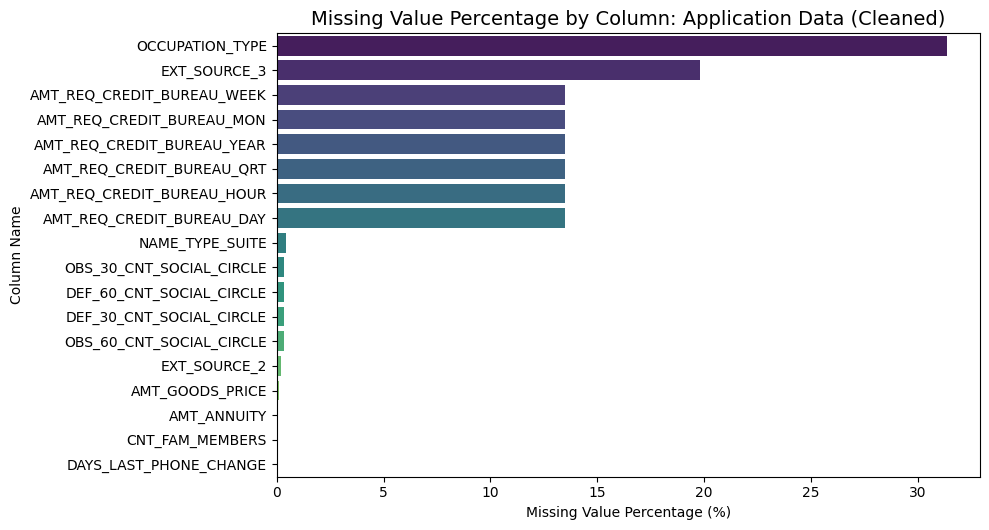

C:\Users\Jiban Hussain\AppData\Local\Temp\ipykernel_11976\776893569.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_pct.values, y=missing_pct.index, palette="viridis")


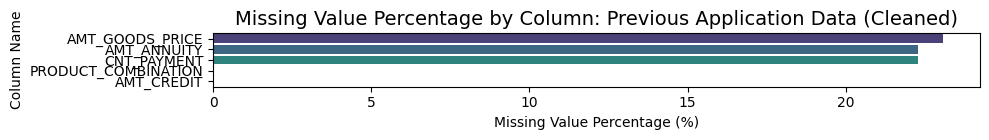

In [8]:
# Visualize missing values in cleaned datasets

def visualize_missing_values_cleaned(df, title):
    missing_pct = df.isnull().mean() * 100
    missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)
    if missing_pct.empty:
        print(f"No missing values in {title} (cleaned dataset).")
        return
    plt.figure(figsize=(10, min(6, len(missing_pct) * 0.3)))
    sns.barplot(x=missing_pct.values, y=missing_pct.index, palette="viridis")
    plt.title(f"Missing Value Percentage by Column: {title} (Cleaned)", fontsize=14)
    plt.xlabel("Missing Value Percentage (%)")
    plt.ylabel("Column Name")
    plt.tight_layout()
    plt.show()

visualize_missing_values_cleaned(app_clean, "Application Data")
visualize_missing_values_cleaned(prev_clean, "Previous Application Data")

## 5. Data Cleaning Steps

This section covers:

- Removing duplicate rows

- Filling missing numeric values with median

- Filling missing categorical values with mode

In [9]:
# Remove duplicates and fill missing values in cleaned datasets

def clean_data(df):
    # Remove duplicate rows
    before = df.shape[0]
    df = df.drop_duplicates()
    after = df.shape[0]
    print(f"Removed {before - after} duplicate rows.")
    
    # Fill missing values for numeric columns with median
    num_cols = df.select_dtypes(include=["number"]).columns
    for col in num_cols:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
    
    # Fill missing values for categorical columns with mode
    cat_cols = df.select_dtypes(include=["object", "category"]).columns
    for col in cat_cols:
        mode_val = df[col].mode().iloc[0] if not df[col].mode().empty else None
        if mode_val is not None:
            df[col] = df[col].fillna(mode_val)
    return df

app_final = clean_data(app_clean)
prev_final = clean_data(prev_clean)

print("Application Data shape after cleaning:", app_final.shape)
print("Previous Application Data shape after cleaning:", prev_final.shape)

Removed 0 duplicate rows.
Removed 0 duplicate rows.
Removed 0 duplicate rows.
Application Data shape after cleaning: (307511, 73)
Previous Application Data shape after cleaning: (1670214, 26)
Application Data shape after cleaning: (307511, 73)
Previous Application Data shape after cleaning: (1670214, 26)


### 5.1 Visualization of Cleaned Data

The plots below display comprehensive visual summaries of the final cleaned datasets after all imputation steps (median for numeric, mode for categorical) are complete.

**Plot 1: Numeric Column Distributions**

- **Left panel (Application Data)**: overlaid histograms of the first 6 numeric columns showing the spread and shape of each feature's distribution after imputation.
- **Right panel (Previous Application Data)**: the same visualization for the Previous Application dataset.

**Interpretation**:
- Overlapping histograms help identify which numeric features are skewed or have outliers.
- Taller frequencies indicate more common values.
- Wide distributions suggest high variability; narrow peaks suggest concentrated values.

**Plot 2: Data Quality Summary**

- **Left chart**: final dataset dimensions — compares the number of rows (actual count) and columns (scaled ×50 for visibility).
- **Right chart**: remaining missing values count — should be **0 (green)** for a fully cleaned dataset. Red bars indicate incomplete cleaning.

**Key takeaways**

- After cleaning, both datasets should have **zero missing values** across all columns.
- The row counts show how much data survives after removing duplicates.
- The column counts reflect high-missingness columns that were dropped in Section 4.4.
- Use the numeric distributions to identify features that may need scaling or transformation for modeling.

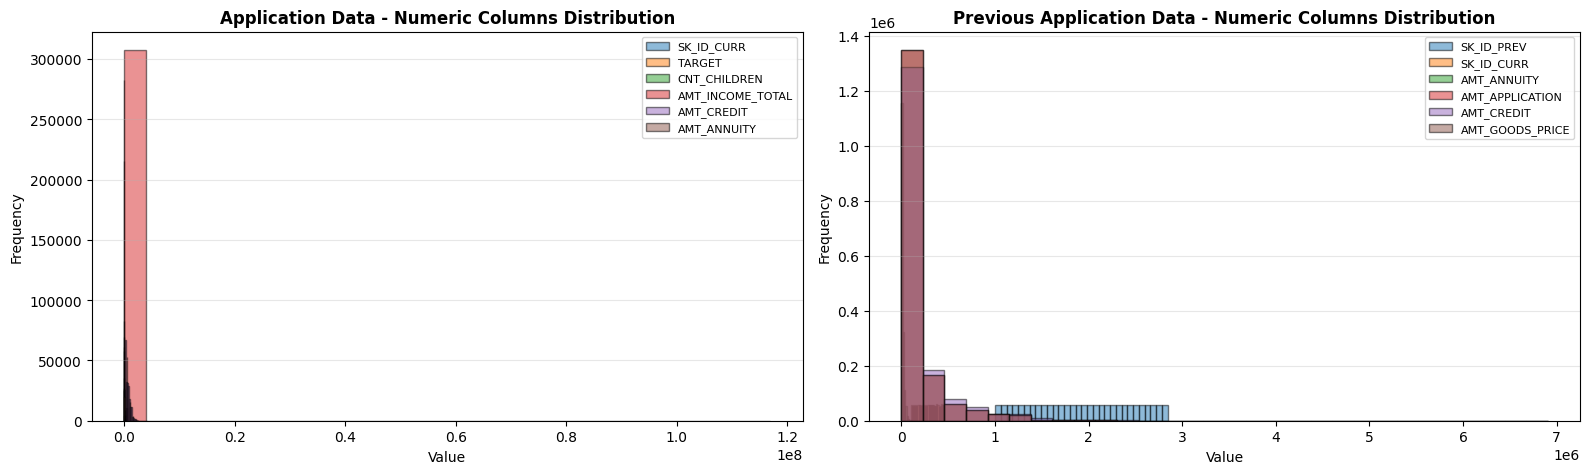

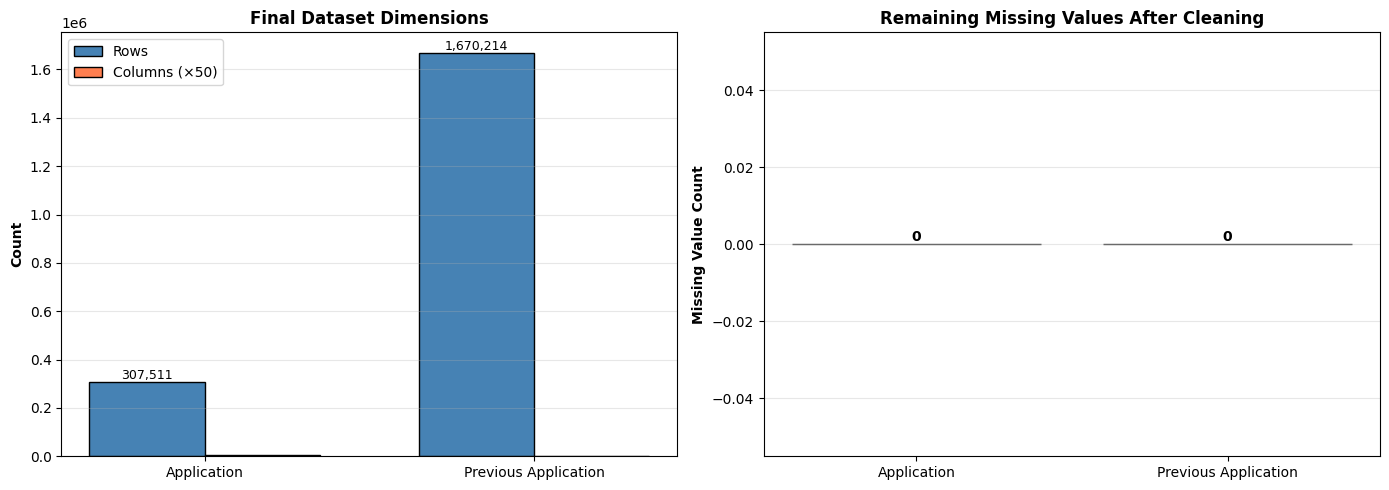


FINAL CLEANED DATASETS SUMMARY

Application Data Shape: (307511, 73)
  - Rows: 307,511
  - Columns: 73
  - Missing Values: 0

Previous Application Data Shape: (1670214, 26)
  - Rows: 1,670,214
  - Columns: 26
  - Missing Values: 0
  - Missing Values: 0


In [10]:
# Improved visualizations of cleaned datasets

# Plot 1: Numeric columns distributions (histograms)
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Application Data - numeric columns
num_cols_app = app_final.select_dtypes(include=['number']).columns[:6]
for idx, col in enumerate(num_cols_app):
    axes[0].hist(app_final[col].dropna(), bins=30, alpha=0.5, label=col, edgecolor='black')
axes[0].set_title('Application Data - Numeric Columns Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[0].legend(fontsize=8)
axes[0].grid(axis='y', alpha=0.3)

# Previous Application Data - numeric columns
num_cols_prev = prev_final.select_dtypes(include=['number']).columns[:6]
for idx, col in enumerate(num_cols_prev):
    axes[1].hist(prev_final[col].dropna(), bins=30, alpha=0.5, label=col, edgecolor='black')
axes[1].set_title('Previous Application Data - Numeric Columns Distribution', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')
axes[1].legend(fontsize=8)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Plot 2: Data quality comparison (rows and columns before/after)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Dataset comparison
datasets = ['Application', 'Previous Application']
final_shapes = [app_final.shape[0], prev_final.shape[0]]
final_cols = [app_final.shape[1], prev_final.shape[1]]

x = range(len(datasets))
width = 0.35

bars1 = axes[0].bar([i - width/2 for i in x], final_shapes, width, label='Rows', color='steelblue', edgecolor='black')
bars2 = axes[0].bar([i + width/2 for i in x], [c * 50 for c in final_cols], width, label='Columns (×50)', color='coral', edgecolor='black')
axes[0].set_ylabel('Count', fontweight='bold')
axes[0].set_title('Final Dataset Dimensions', fontsize=12, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(datasets)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom', fontsize=9)

# Missing values check (should be 0)
missing_app = app_final.isnull().sum().sum()
missing_prev = prev_final.isnull().sum().sum()

colors_missing = ['green' if x == 0 else 'red' for x in [missing_app, missing_prev]]
bars = axes[1].bar(datasets, [missing_app, missing_prev], color=colors_missing, edgecolor='black', alpha=0.7)
axes[1].set_ylabel('Missing Value Count', fontweight='bold')
axes[1].set_title('Remaining Missing Values After Cleaning', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary
print("\n" + "="*60)
print("FINAL CLEANED DATASETS SUMMARY")
print("="*60)
print(f"\nApplication Data Shape: {app_final.shape}")
print(f"  - Rows: {app_final.shape[0]:,}")
print(f"  - Columns: {app_final.shape[1]}")
print(f"  - Missing Values: {app_final.isnull().sum().sum()}")

print(f"\nPrevious Application Data Shape: {prev_final.shape}")
print(f"  - Rows: {prev_final.shape[0]:,}")
print(f"  - Columns: {prev_final.shape[1]}")
print(f"  - Missing Values: {prev_final.isnull().sum().sum()}")
print("="*60)

## 6. Univariate Analysis (Application Data)

**Purpose**: Examine the distribution and characteristics of individual features in `app_final` in isolation. This helps identify data patterns, skewness, outliers, feature importance, and potential data quality issues before modeling.

**Why focus on `app_final`?**

- `app_final` is the **primary dataset** containing current loan applications with direct rows mapped to the target variable (loan default status).
- Univariate distributions of `app_final` features directly inform which features are predictive of loan default risk.
- It has larger sample sizes and clearer business meaning per feature compared to historical data.
- Understanding these distributions is essential for feature engineering, scaling decisions, and model preparation.

**What this section covers**

- **6.1 Categorical Variables**: Count plots showing frequency distributions of categorical features.
- **6.2 Numerical Variables**: Histograms showing distribution shapes, spread, and potential outliers in numeric features.

**How to use insights from this section**

- Identify skewed features that may need log-transformation.
- Spot imbalanced categories that require special handling.
- Detect outliers that need investigation or capping.
- Plan for feature scaling and normalization before modeling.

### 6.1 Categorical Variables (Application Data)

**Purpose**: Visualize the distribution of categorical features in `app_final` to understand category frequencies, identify imbalanced classes, and spot potential data quality issues.

**What to expect**

- Count plots showing the frequency of each category value in the top 10 categorical columns.
- Categories are color-coded for easy distinction.
- X-axis labels are rotated for readability.

**How to interpret**

- **Tall bars** indicate common category values (high frequency).
- **Short bars** suggest rare categories that may need grouping or special handling.
- **Imbalanced distributions** (one category much more frequent than others) may impact model training; consider oversampling, undersampling, or class weights.
- Look for unexpected categories (typos, encoding issues) that should have been caught in cleaning.

**Key insights to look for**

- Which categories dominate the data?
- Are there any rare categories that should be grouped or dropped?
- Do category distributions suggest data collection or recording biases?

Total Categorical Features: 12


C:\Users\Jiban Hussain\AppData\Local\Temp\ipykernel_11976\2983725618.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=app_final, palette='Set2')


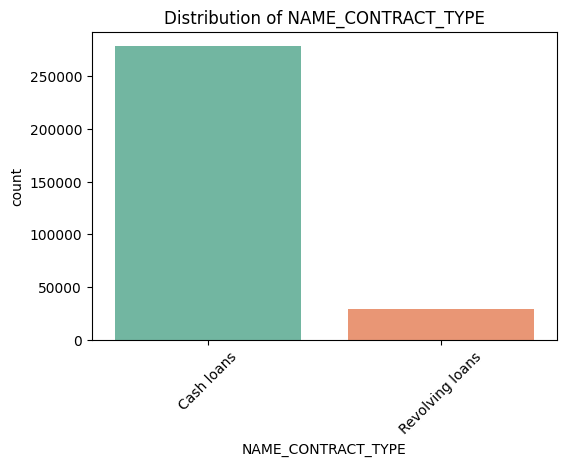

C:\Users\Jiban Hussain\AppData\Local\Temp\ipykernel_11976\2983725618.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=app_final, palette='Set2')


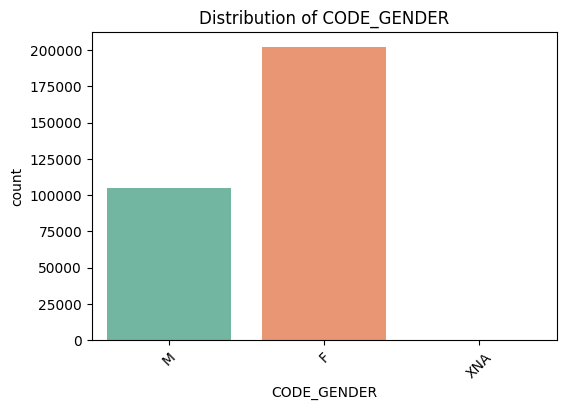

C:\Users\Jiban Hussain\AppData\Local\Temp\ipykernel_11976\2983725618.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=app_final, palette='Set2')


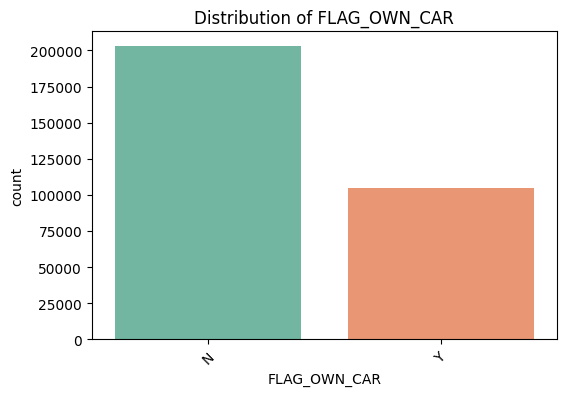

C:\Users\Jiban Hussain\AppData\Local\Temp\ipykernel_11976\2983725618.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=app_final, palette='Set2')


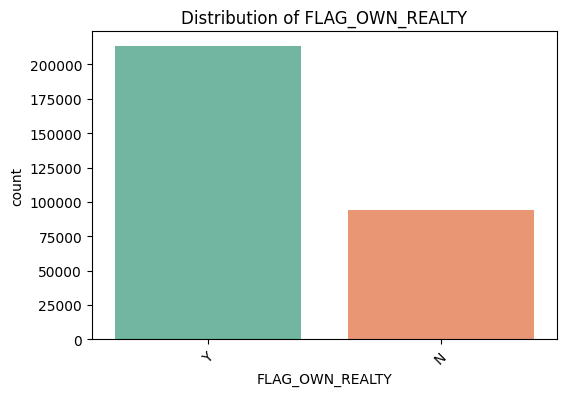

C:\Users\Jiban Hussain\AppData\Local\Temp\ipykernel_11976\2983725618.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=app_final, palette='Set2')


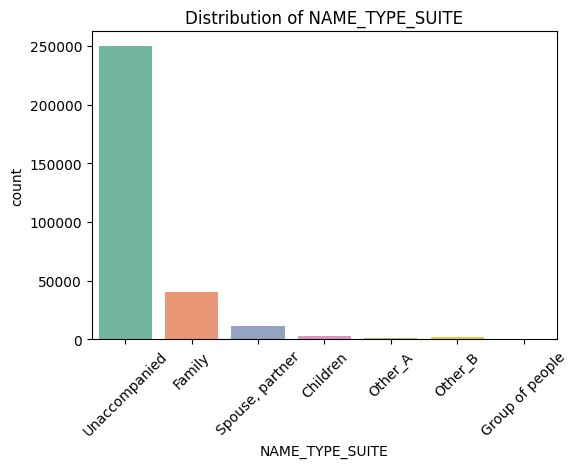

C:\Users\Jiban Hussain\AppData\Local\Temp\ipykernel_11976\2983725618.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=app_final, palette='Set2')


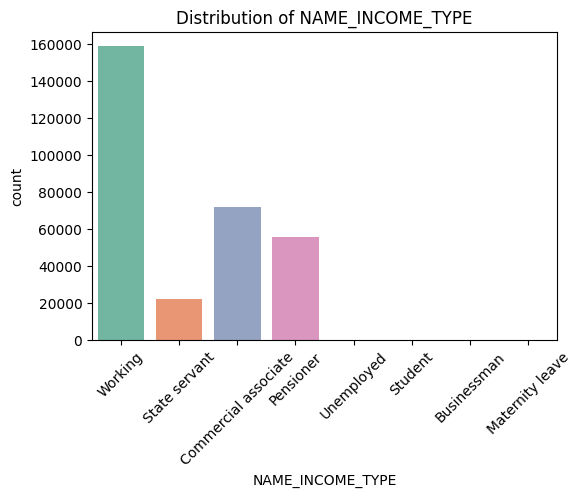

C:\Users\Jiban Hussain\AppData\Local\Temp\ipykernel_11976\2983725618.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=app_final, palette='Set2')


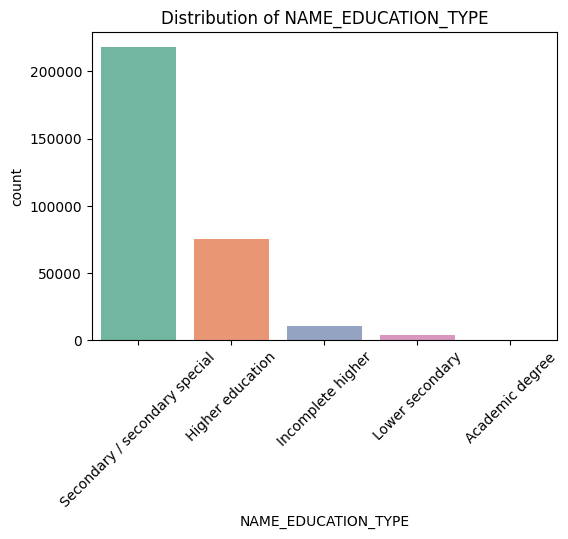

C:\Users\Jiban Hussain\AppData\Local\Temp\ipykernel_11976\2983725618.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=app_final, palette='Set2')


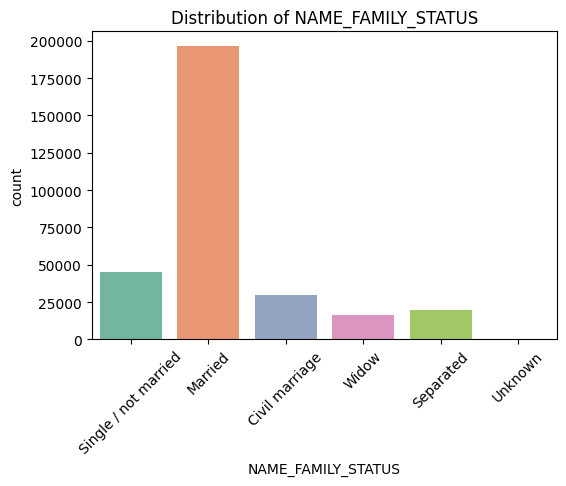

C:\Users\Jiban Hussain\AppData\Local\Temp\ipykernel_11976\2983725618.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=app_final, palette='Set2')


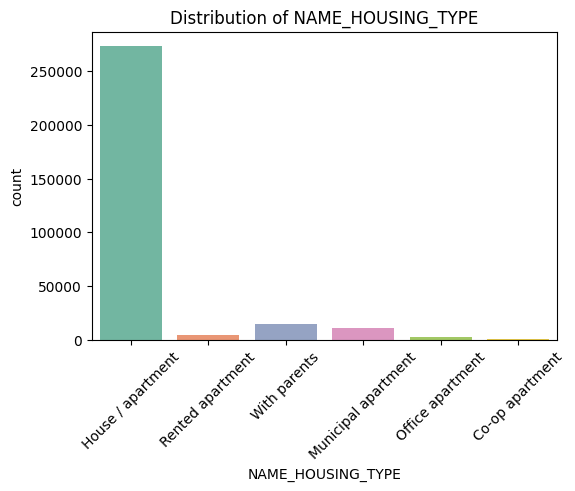

C:\Users\Jiban Hussain\AppData\Local\Temp\ipykernel_11976\2983725618.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=app_final, palette='Set2')


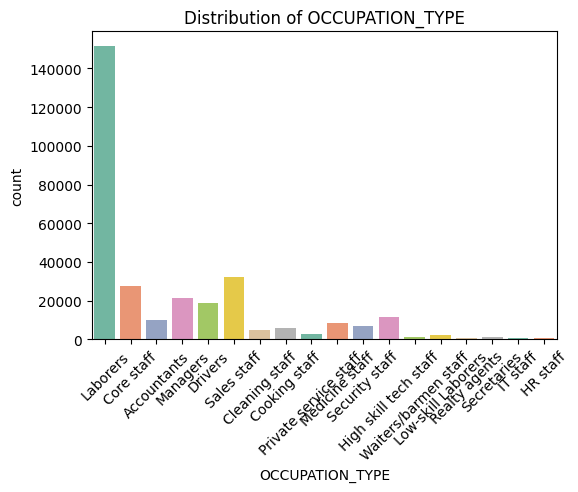

In [11]:
categorical = app_final.select_dtypes(include='object').columns.tolist()
print(f"Total Categorical Features: {len(categorical)}")

for col in categorical[:10]:  # Show top 10 for readability
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=app_final, palette='Set2')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

### 6.2 Numerical Variables (Application Data)

**Purpose**: Visualize the distribution of numeric features in `app_final` to understand central tendency, spread, skewness, and identify outliers and data anomalies.

**What to expect**

- Multi-panel histograms showing the frequency distribution of all numeric columns.
- Bins are set to 20 for a reasonable balance between detail and smoothness.
- Distributions may show various shapes: normal, skewed, bimodal, etc.

**How to interpret**

- **Bell-shaped (normal) distribution**: feature values are centered around a mean; many ML algorithms assume normality.
- **Left-skewed or right-skewed**: tail extends to one side; may indicate outliers or natural business patterns (e.g., loan amounts often skewed right).
- **Bimodal or multi-modal**: multiple peaks suggest distinct groups or subpopulations in the data; consider feature engineering or stratified modeling.
- **Extreme outliers** (bars far from the main distribution): may be data errors, rare events, or legitimate high/low values requiring special handling.

**Key insights to look for**

- Which features are normally distributed vs. heavily skewed?
- Are there outliers that need capping, transformation, or investigation?
- Which features might benefit from scaling or log-transformation before modeling?
- Do distributions suggest data quality issues or natural patterns in loan behavior?

Total Numerical Features: 61


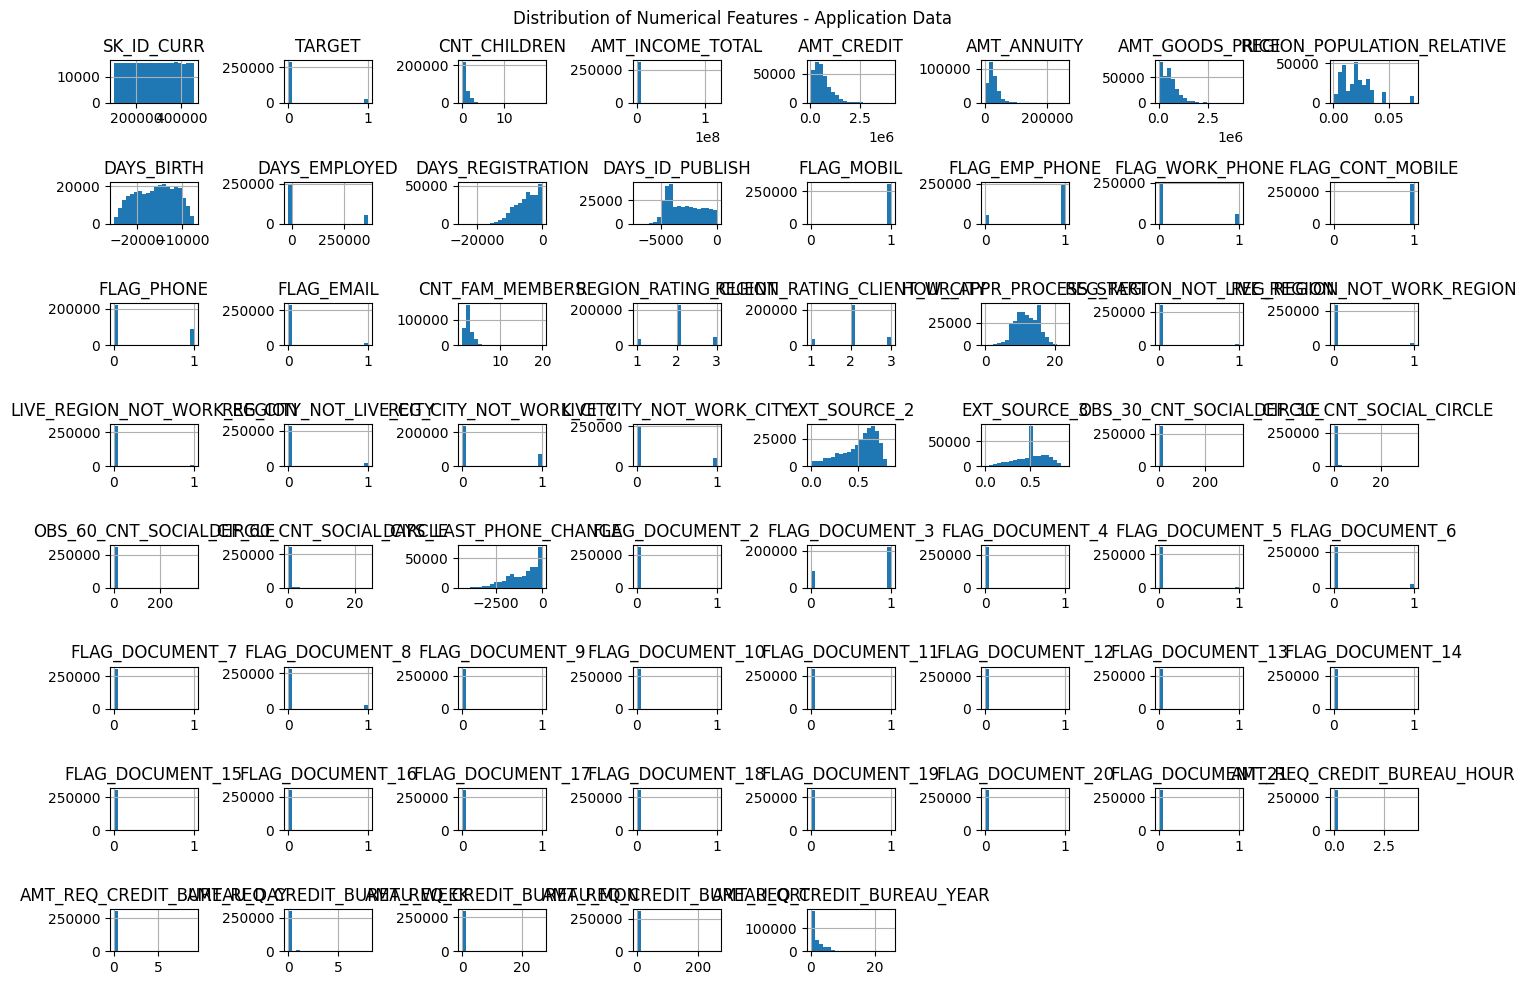

In [12]:
numerical = app_final.select_dtypes(include=np.number).columns.tolist()
print(f"Total Numerical Features: {len(numerical)}")

app_final[numerical].hist(figsize=(14,10), bins=20)
plt.suptitle("Distribution of Numerical Features - Application Data")
plt.tight_layout()
plt.show()

## 7. Outlier Detection (Application Data)

**Purpose**: Identify and visualize outliers in key numeric features using boxplots. Outliers can significantly impact model performance and may represent data errors, rare legitimate events, or extreme applicant profiles.

**What to expect**

- Boxplots for the most important numeric features in loan applications.
- Each boxplot shows:
  - **Box**: the middle 50% of data (IQR: 25th to 75th percentile).
  - **Line inside box**: the median value (50th percentile).
  - **Whiskers**: extend to 1.5 × IQR beyond the quartiles.
  - **Dots**: individual outlier points beyond the whiskers.

**Features analyzed**

- `AMT_INCOME_TOTAL` — Total income of the applicant (can be skewed by very high earners).
- `AMT_CREDIT` — Credit amount requested (extreme requests may be outliers or valid high cases).
- `AMT_ANNUITY` — Annuity amount (payment obligation; may have rare high values).
- `DAYS_EMPLOYED` — Days of employment (negative or extremely high values may indicate data issues).
- `DAYS_BIRTH` — Days since birth (converts to age; very young or very old applicants).

**How to interpret**

- **Points beyond whiskers** are statistical outliers (typically >1.5 × IQR from quartiles).
- **Many outliers** may indicate natural business variation (e.g., income naturally has extreme values) or data quality issues.
- **Isolated dots** vs. **clusters of dots** tell different stories: isolated = rare events, clusters = possible data collection bias.

**Action items**

1. **Investigate high-impact outliers**: Are they genuine business cases (e.g., rich applicants, very long employment) or data errors?
2. **Document outlier handling**: Cap extreme values, use robust scaling, or create outlier flags for modeling.
3. **Consider model choice**: Tree-based models (Random Forest, XGBoost) are robust to outliers; linear models need careful treatment.
4. **Check correlation with target**: Do outliers default at different rates than typical applicants?

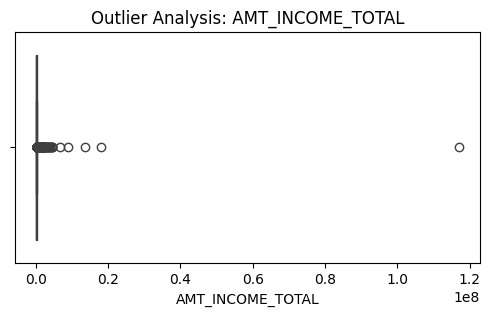

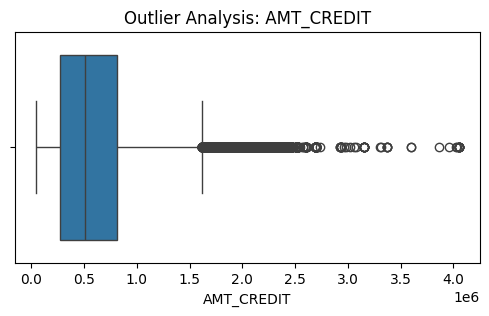

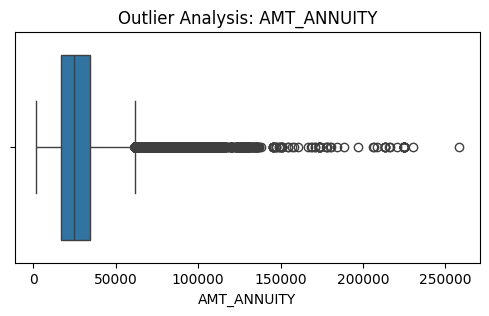

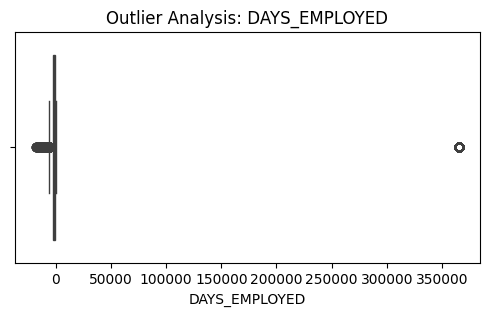

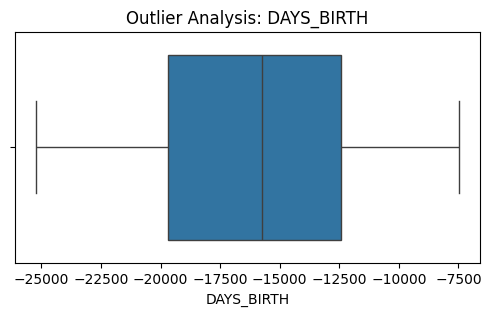

In [13]:
important_cols = ["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "DAYS_EMPLOYED", "DAYS_BIRTH"]

for col in important_cols:
    if col in app_final.columns:
        plt.figure(figsize=(6,3))
        sns.boxplot(x=app_final[col])
        plt.title(f"Outlier Analysis: {col}")
        plt.show()

## 8. Feature Engineering

**Purpose**: Create derived variables that capture meaningful relationships and domain knowledge. Feature engineering transforms raw features into new features that better represent applicant risk profiles and improve model predictiveness.

**Features created in this section**

1. **Loan-to-Income Ratio** (`AMT_CREDIT / AMT_INCOME_TOTAL`)
   - Measures debt burden: how much credit requested relative to income
   - Higher ratios indicate higher financial stress and risk
   - Useful metric for assessing repayment capacity

2. **Years Employed** (convert `DAYS_EMPLOYED` to years)
   - Transforms negative/absolute days into interpretable years
   - Indicates job stability and experience tenure
   - Longer employment history often correlates with lower default risk

3. **Age** (convert `DAYS_BIRTH` to years)
   - Transforms birth days into actual age in years
   - Age may have non-linear relationship with default (e.g., very young or very old applicants)
   - Useful for stratified analysis and age-based grouping

**Why these features matter**

- **Ratios** simplify interpretation: loan-to-income directly reflects financial burden.
- **Conversions** improve readability: years are more intuitive than negative days.
- **Domain knowledge**: these features capture business logic from lending risk assessment.
- **Downstream modeling**: engineered features often improve model performance and interpretability.

**How to interpret the outputs**

- **Summary statistics** (mean, std, min, max) help identify feature ranges and distributions.
- **Loan-to-Income Ratio**: values > 1 mean credit exceeds income (high risk indicator).
- **Years Employed**: low values indicate job changers; high values indicate stability.
- **Age**: may show clusters (young applicants, prime-age workers, seniors).



✓ Created: Loan_to_Income_Ratio
✓ Created: Years_Employed
✓ Created: Age

ENGINEERED FEATURES - SUMMARY STATISTICS


,count,mean,std,min,25%,50%,75%,max
Loan_to_Income_Ratio,307511.0,3.957570,2.689728,0.004808,2.018667,3.265067,5.159880,84.736842
Years_Employed,307511.0,185.547239,382.037676,0.000000,2.556164,6.079452,15.635616,1000.665753
Age,307511.0,43.936973,11.956133,20.517808,34.008219,43.150685,53.923288,69.120548


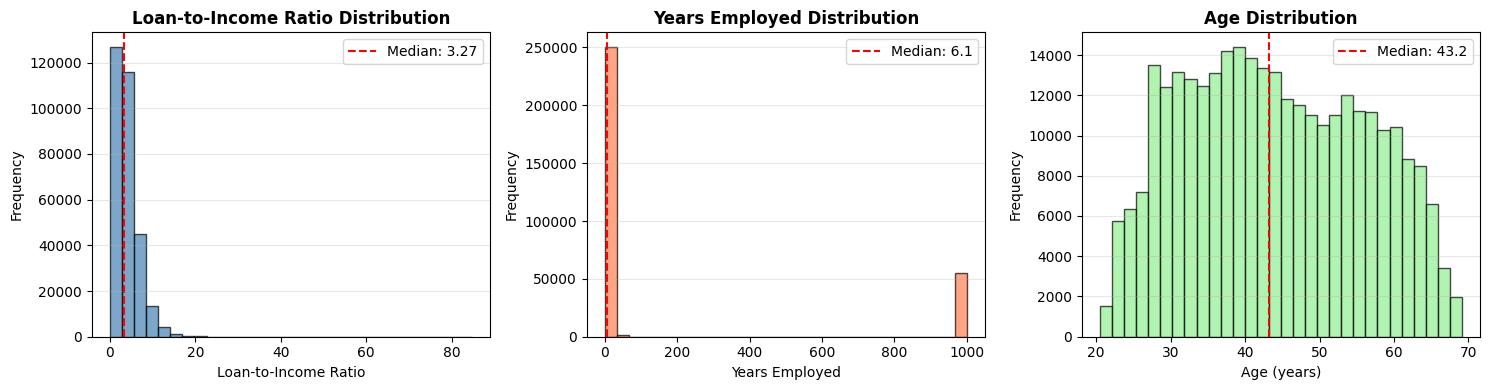


✓ Feature engineering complete. New columns added to app_final.


In [26]:
# Create engineered features
if "AMT_CREDIT" in app_final.columns and "AMT_INCOME_TOTAL" in app_final.columns:
    app_final['Loan_to_Income_Ratio'] = app_final['AMT_CREDIT'] / app_final['AMT_INCOME_TOTAL']
    print("✓ Created: Loan_to_Income_Ratio")

if "DAYS_EMPLOYED" in app_final.columns:
    app_final['Years_Employed'] = abs(app_final['DAYS_EMPLOYED']) / 365
    print("✓ Created: Years_Employed")

if "DAYS_BIRTH" in app_final.columns:
    app_final['Age'] = abs(app_final['DAYS_BIRTH']) / 365
    print("✓ Created: Age")

# Summary statistics for engineered features
print("\n" + "="*70)
print("ENGINEERED FEATURES - SUMMARY STATISTICS")
print("="*70)
engineered_features = app_final[['Loan_to_Income_Ratio', 'Years_Employed', 'Age']].describe().T
display(engineered_features)

# Visualize engineered features
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Loan-to-Income Ratio
axes[0].hist(app_final['Loan_to_Income_Ratio'].dropna(), bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Loan-to-Income Ratio Distribution', fontweight='bold')
axes[0].set_xlabel('Loan-to-Income Ratio')
axes[0].set_ylabel('Frequency')
axes[0].axvline(app_final['Loan_to_Income_Ratio'].median(), color='red', linestyle='--', label=f"Median: {app_final['Loan_to_Income_Ratio'].median():.2f}")
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Years Employed
axes[1].hist(app_final['Years_Employed'].dropna(), bins=30, color='coral', edgecolor='black', alpha=0.7)
axes[1].set_title('Years Employed Distribution', fontweight='bold')
axes[1].set_xlabel('Years Employed')
axes[1].set_ylabel('Frequency')
axes[1].axvline(app_final['Years_Employed'].median(), color='red', linestyle='--', label=f"Median: {app_final['Years_Employed'].median():.1f}")
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

# Age
axes[2].hist(app_final['Age'].dropna(), bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[2].set_title('Age Distribution', fontweight='bold')
axes[2].set_xlabel('Age (years)')
axes[2].set_ylabel('Frequency')
axes[2].axvline(app_final['Age'].median(), color='red', linestyle='--', label=f"Median: {app_final['Age'].median():.1f}")
axes[2].legend()
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Feature engineering complete. New columns added to app_final.")




## Visualizations Showing

**Loan-to-Income Ratio = 3.27 (Median)**

-   Most borrowers taking on significant debt relative to income
-   Indicates moderate-to-high financial leverage in the portfolio

**Years Employed = 6.08 (Median)**

-   Moderate job tenure suggests reasonable employment stability
-   But high variability indicates diverse employment backgrounds

**Age = 43.15 (Median)**

-   Mature borrowers with established income and credit history
-   Prime lending demographic (less risky than very young or very old)




## 9. Bivariate Analysis (Target-Feature Relationships)

**Purpose**: Analyze how individual features relate to the target variable (loan default status). Bivariate analysis reveals which features have predictive power for identifying defaulters and non-defaulters.

**Why bivariate analysis matters**

- **Feature Predictiveness**: Identify which features strongly differentiate defaulters from non-defaulters.
- **Risk Stratification**: Understand how features vary across default vs. non-default groups.
- **Feature Selection**: Prioritize features for modeling based on their discriminative power.
- **Business Insights**: Translate statistical patterns into actionable risk factors.

**What this section covers**

- **9.1 Target Distribution**: Overview of loan default rates in the portfolio.
- **9.2 Numerical Features vs. Target**: Boxplots showing how numeric features differ between defaulters and non-defaulters.

**How to interpret the visualizations**

- **Non-overlapping distributions**: Feature strongly separates the two groups → high predictive power.
- **Overlapping distributions**: Feature has weak discriminative power → may be less useful for modeling.
- **Box position differences**: Center/spread differences indicate different risk profiles.


### 9.1 Target Variable Distribution

**Purpose**: Visualize the distribution of loan default status across the portfolio to understand class balance and default rates.

**What to expect**

- A pie chart showing the proportion of defaulters vs. non-defaulters.
- Percentages indicating the base rate of default in the dataset.

  



Target Column: TARGET


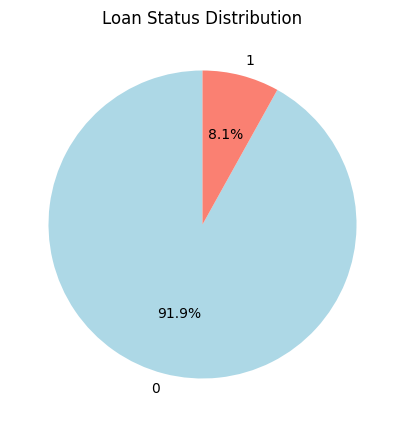

In [15]:
target_col = None
for cand in ["TARGET","IS_DEFAULT","DEFAULT","LOAN_STATUS"]:
    if cand in app_final.columns:
        target_col = cand
        break

if target_col:
    print("Target Column:", target_col)
    plt.figure(figsize=(5,5))
    app_final[target_col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue','salmon'])
    plt.title("Loan Status Distribution")
    plt.ylabel('')
    plt.show()
else:
    print("No target column found in application_data.")


### 9.2 Numerical Features vs. Target Variable

**Purpose**: Analyze how numeric features vary between defaulters and non-defaulters. This reveals which financial metrics best distinguish high-risk from low-risk applicants.

**What to expect**

- Boxplots for key numeric features, separated by target class (e.g., Default=1 vs. Default=0).
- Side-by-side comparison showing distribution differences between the two groups.
- Features analyzed: `AMT_INCOME_TOTAL`, `AMT_CREDIT`, `Loan_to_Income_Ratio`, `Age`.

**How to interpret boxplots**

- **Separated boxes**: Strong difference between groups → feature is predictive of default.
- **Overlapping boxes**: Weak difference → feature has low discriminative power.
- **Lower median for defaulters**: Feature value is systematically lower in defaulters (risk indicator).
- **Higher median for defaulters**: Feature value is systematically higher in defaulters (risk indicator).
- **Wider box in defaulters**: More variability in that group → less stable/predictable profile.





C:\Users\Jiban Hussain\AppData\Local\Temp\ipykernel_11976\610972583.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=app_final, palette='coolwarm')


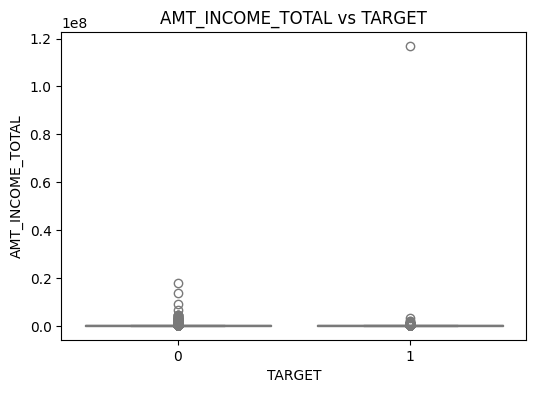

C:\Users\Jiban Hussain\AppData\Local\Temp\ipykernel_11976\610972583.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=app_final, palette='coolwarm')


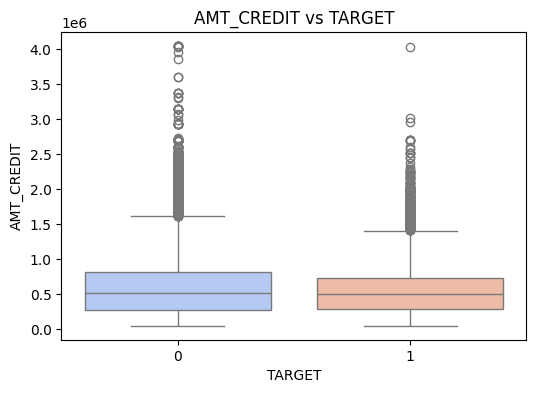

C:\Users\Jiban Hussain\AppData\Local\Temp\ipykernel_11976\610972583.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=app_final, palette='coolwarm')


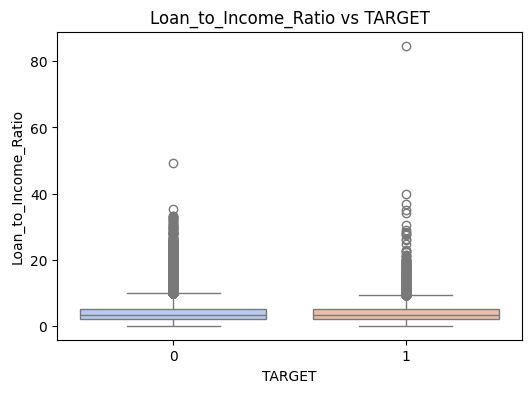

C:\Users\Jiban Hussain\AppData\Local\Temp\ipykernel_11976\610972583.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=app_final, palette='coolwarm')


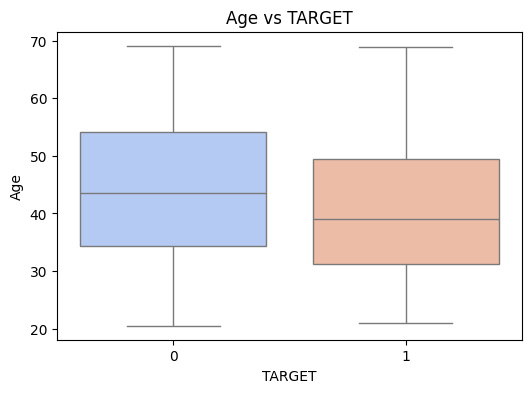

In [16]:
if target_col:
    num_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'Loan_to_Income_Ratio', 'Age']
    for col in num_cols:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=target_col, y=col, data=app_final, palette='coolwarm')
        plt.title(f"{col} vs {target_col}")
        plt.show()


## 10. Correlation Analysis

**Purpose**: Analyze relationships between numeric features and identify multicollinearity issues. Understanding feature correlations helps with feature selection, preventing model overfitting, and understanding feature interactions.

**Why correlation analysis matters**

- **Feature Relationships**: Identify which features move together; reveals underlying patterns
- **Multicollinearity Detection**: Find highly correlated features that provide redundant information
- **Feature Selection**: Remove correlated features to simplify models and improve interpretability
- **Target Correlation**: Identify features most strongly correlated with default risk
- **Model Performance**: High correlations can inflate model weights or cause instability

**What to interpret**

- **Strong positive correlation (>0.7)**: Features increase together; likely redundant information
- **Strong negative correlation (<-0.7)**: Features move in opposite directions; capture different patterns
- **Weak correlation (-0.3 to 0.3)**: Features have little linear relationship; both may be useful
- **Color coding in heatmap**:
  - **Red colors**: Strong positive correlation
  - **Blue colors**: Strong negative correlation
  - **White/light colors**: Weak or no correlation






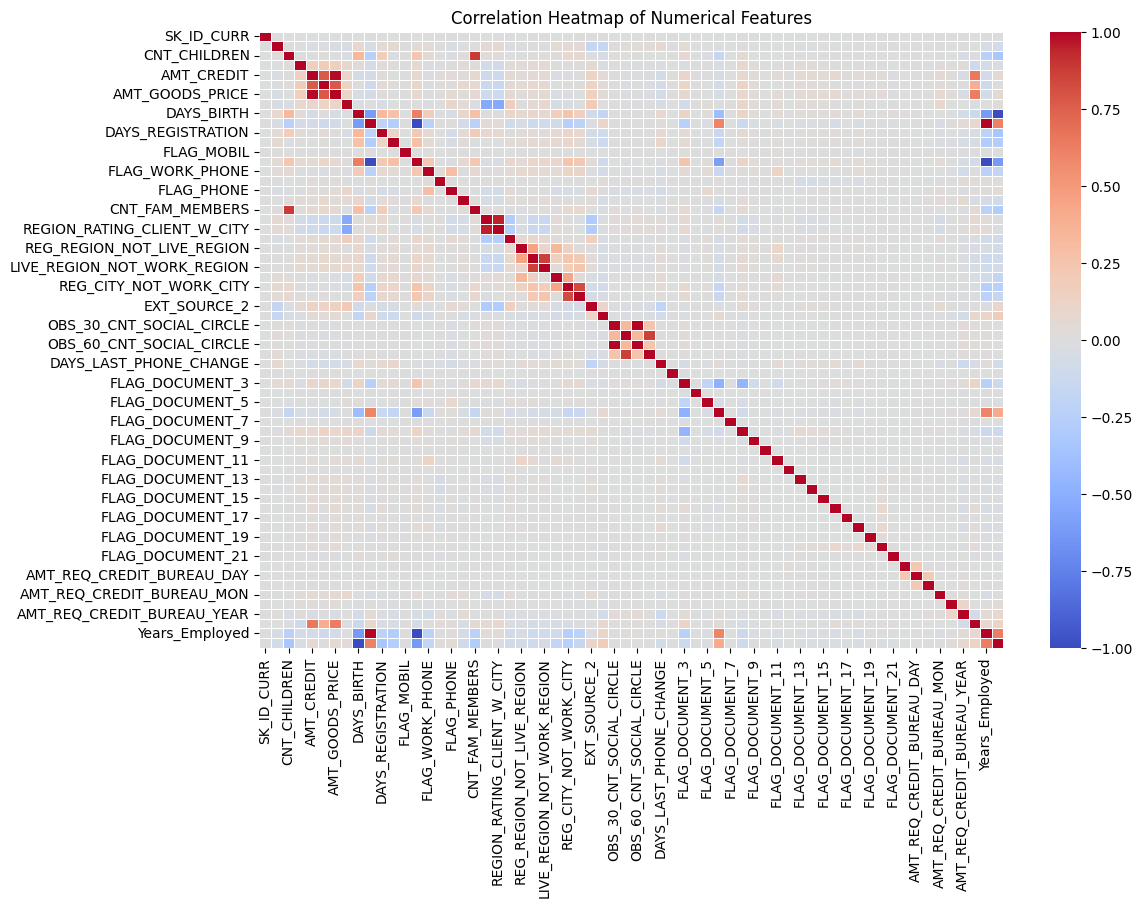

In [17]:
corr = app_final.select_dtypes(include=np.number).corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


## 11. Previous Application Data Insights

**Purpose**: Analyze historical loan application patterns to understand customer behavior, application frequency, and outcomes. Previous application data helps create behavioral features that may predict default risk.

**Why previous application data matters**

- **Customer Behavior**: Understand repeat borrowers vs. first-time applicants
- **Approval Patterns**: Identify which contract statuses are associated with current defaults
- **Application Frequency**: Customers with many previous rejections may be higher risk
- **Feature Engineering**: Create behavioral features (rejection count, success rate, time since last app)
- **Target Variable Insights**: Check if previous rejections/approvals correlate with current default

**What this section covers**

- **11.1 Basic Overview**: Contract types, application statuses, application timing patterns
- **11.2 Application Frequency**: How many previous applications per customer; repeat borrower behavior
- **11.3 Merged View**: Link previous applications to current applications for behavioral analysis

**Business context**

- **Contract Type**: What type of loans did applicants apply for previously? (cash, revolving, consumer)
- **Contract Status**: Were previous applications approved, refused, canceled, or ended?
- **Application Timing**: Day of week patterns; do certain days have higher default rates?
- **Frequency Patterns**: Do repeat applicants default more/less than first-time applicants?

**Expected insights**

- High rejection frequency → likely higher default risk
- Multiple previous approvals → may indicate stable, creditworthy applicants
- Recent rejections → applicant urgency; possible desperation factor


### 11.1 Basic Overview - Previous Application Characteristics

**Purpose**: Visualize the distribution of key categorical features in previous applications to understand what types of loans were applied for, how they were approved/rejected, and when they were processed.

**Features analyzed**

1. **NAME_CONTRACT_TYPE**: Type of previous loan application
   - `Cash loan`: Unsecured personal loans (higher risk)
   - `Revolving credit`: Flexible credit lines (different risk profile)
   - `Consumer loan`: Consumer credit products

2. **NAME_CONTRACT_STATUS**: Outcome of previous application
   - `Approved`: Application was accepted
   - `Refused`: Application was rejected
   - `Canceled`: Application was withdrawn/canceled
   - `Ended`: Completed (successfully paid off or defaulted)
   - `Demand`: Loan demand was made

3. **WEEKDAY_APPR_PROCESS_START**: Day of week application was processed
   - Can reveal temporal patterns in approval rates
   - Different days may have different processing standards

**How to interpret**

- **Tall bars**: Common application types/statuses
- **Short bars**: Rare categories; may indicate niche products or outcomes
- **Contract Type distribution**: Cash loans typically dominate; reveals appetite for different products
- **Contract Status distribution**: High refusal rate suggests strict approval criteria
- **Weekday patterns**: Uniform across weekdays or concentrated on specific days?


**Risk implications**

- Applicants with many previous refusals → likely high current default risk
- Applicants with previous approvals → lower risk if no defaults occurred
- Recent refusal followed by current application → may indicate desperation
- Canceled applications → possible red flags (why did they cancel?)


C:\Users\Jiban Hussain\AppData\Local\Temp\ipykernel_11976\1798323435.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=prev_final, palette='muted')


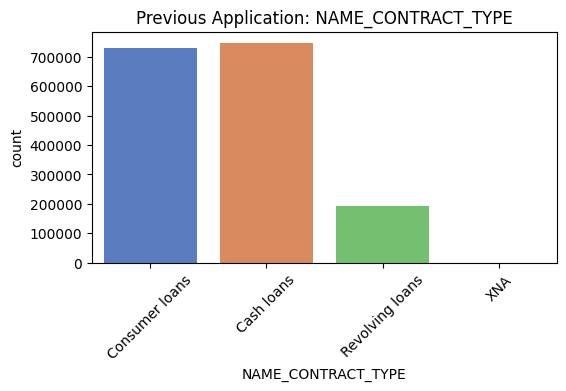

C:\Users\Jiban Hussain\AppData\Local\Temp\ipykernel_11976\1798323435.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=prev_final, palette='muted')


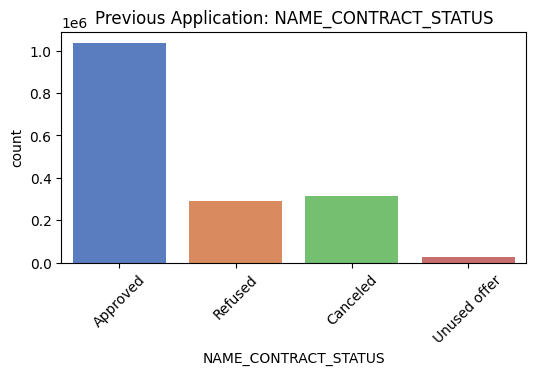

C:\Users\Jiban Hussain\AppData\Local\Temp\ipykernel_11976\1798323435.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=prev_final, palette='muted')


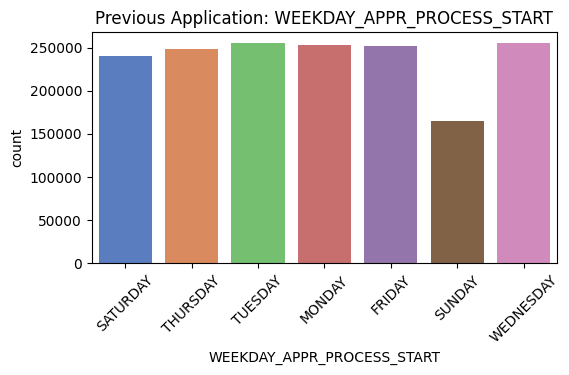

In [18]:
for col in ["NAME_CONTRACT_TYPE", "NAME_CONTRACT_STATUS", "WEEKDAY_APPR_PROCESS_START"]:
    if col in prev.columns:
        plt.figure(figsize=(6,3))
        sns.countplot(x=col, data=prev_final, palette='muted')
        plt.title(f"Previous Application: {col}")
        plt.xticks(rotation=45)
        plt.show()


### 11.2 Previous Application Frequency per Customer

**Purpose**: Understand borrowing history - how many previous applications does each customer have? This helps identify repeat customers, application persistence, and urgency indicators.

**What to expect**

- A histogram showing the distribution of application counts per customer
- Most customers have 0-5 previous applications
- Some customers may have 10+ applications (repeat borrowers or persistent applicants)
- KDE (Kernel Density Estimation) curve showing the overall distribution shape

**How to interpret**

- **Peak at 0**: Many first-time applicants (no previous applications)
- **Peak at 1-2**: Most repeat applicants have 1-2 previous applications
- **Right tail (10+)**: Some customers with many previous applications
  - May indicate: persistent risk-takers, or legitimate repeat customers
  - Analyze: Do high-frequency applicants default more often?

**Key metrics to calculate**

- **Mean previous applications**: Average number per customer
- **Median previous applications**: Typical customer experience
- **Max previous applications**: Highest repeat borrower count
- **% with 0 previous apps**: First-time applicants (baseline risk)
- **% with 5+ previous apps**: Persistent/experienced borrowers

**Risk segments**

1. **First-time applicants (0 previous apps)**
   - Unknown history; standard risk assessment applies
   - May be younger or new to credit market

2. **Repeat customers (1-3 previous apps)**
   - Established borrowing relationship with company
   - Track record available; assess previous outcomes

3. **Frequent applicants (5+ previous apps)**
   - Multiple rejections or completed loans
   - Investigate: successful borrowers or persistent reapplicants?
   - May indicate financial stress or overextension

**Feature engineering ideas**

- `Num_Previous_Apps`: Raw count of previous applications
- `Prev_App_Density`: Previous apps / customer tenure
- `Has_Previous_App`: Binary flag (0 or 1+)
- `Prev_App_Success_Rate`: Approved / Total previous apps
- `Recent_Rejection_Flag`: Was most recent application rejected?


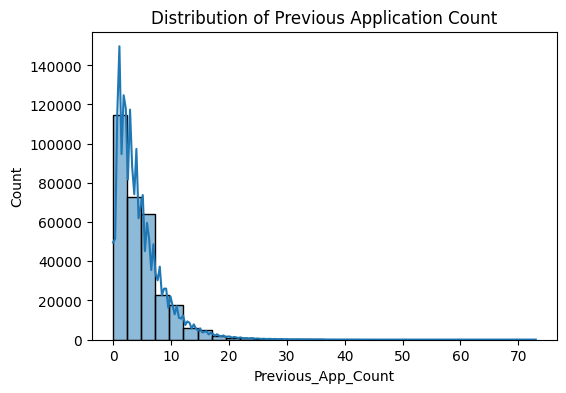

In [19]:
if "SK_ID_CURR" in prev_final.columns and "SK_ID_CURR" in app_final.columns:
    prev_counts = prev_final.groupby("SK_ID_CURR").size().rename("Previous_App_Count").reset_index()
    app_final = app_final.merge(prev_counts, on="SK_ID_CURR", how="left")
    app_final["Previous_App_Count"] = app_final["Previous_App_Count"].fillna(0)
    
    plt.figure(figsize=(6,4))
    sns.histplot(app_final["Previous_App_Count"], bins=30, kde=True)
    plt.title("Distribution of Previous Application Count")
    plt.show()


### 11.3 Merged View: Current + Previous Applications

**Purpose**: Combine current application data with historical previous applications to create a unified customer view. This enables behavioral feature engineering and customer segmentation.

**Data structure after merge**

- **One row per customer in current applications**
- **Multiple rows per customer from previous applications** (historical records)
- **Left merge**: Keeps all current applicants; matches with their previous apps if available
- **Some customers have NULL values** if they have no previous application history

**What to look for in the sample**

1. **Customer ID (SK_ID_CURR)**
   - Links current application to all their previous applications
   - Same ID may appear multiple times if customer has multiple previous apps

2. **Timestamp information**
   - Can calculate: days since last previous application
   - Can identify: application frequency patterns (how often do they apply?)

3. **Contract outcome comparison**
   - Previous applications: what happened (approved, refused, etc.)
   - Current application: what we're predicting (will they default?)
   - Pattern analysis: do previous refusals predict current defaults?

4. **Amount patterns**
   - Are current loan amounts similar to previous? Increasing? Decreasing?
   - Sudden increase in amount → possible desperation signal

**Key questions to investigate**

1. **How many applicants have previous application history?**
   - What % are first-time applicants?

2. **For repeat customers:**
   - What was the outcome of their most recent previous application?
   - Time elapsed between previous and current application?
   - Are they increasing loan amounts over time?

3. **Behavior patterns:**
   - Do applicants with previous refusals have higher current default rates?
   - Do approved previous applicants have lower current default rates?
   - Pattern of repeated rejections → desperation?

4. **Feature engineering from merge:**
   - Previous application approval rate
   - Days since last previous application
   - Trend in loan amounts (increasing/decreasing)
   - Contract type consistency (same type as before?)

**Expected merged dataset insights**

- ~80-95% of applicants may have some previous application history
- Distribution of previous app outcomes (approvals vs. refusals)
- Time gaps between applications
- Amount progression patterns

**Next steps**

1. Aggregate previous applications per customer to create behavioral features
2. Calculate success rates, rejection counts, application frequency
3. Add engineered features to current application data
4. Test if behavioral features improve default prediction
5. Identify segments: first-timers vs. repeat customers vs. persistent applicants


In [20]:
# Merge small sample for inspection
sample_ids = app_final["SK_ID_CURR"].sample(5, random_state=42)
merged_sample = app_final[app_final["SK_ID_CURR"].isin(sample_ids)].merge(prev_final, on="SK_ID_CURR", how="left")
display(merged_sample.head(10))


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,142232,0,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,...,Repeater,Mobile,POS,XNA,Country-wide,25,Connectivity,10.0,low_normal,POS mobile without interest
1,142232,0,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.0,middle,Cash X-Sell: middle
2,142232,0,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,12.0,XNA,Cash
3,142232,0,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,...,New,Mobile,XNA,XNA,Country-wide,28,Connectivity,12.0,XNA,POS mobile with interest
4,142232,0,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,...,Repeater,Mobile,XNA,XNA,Country-wide,28,Connectivity,12.0,XNA,POS mobile with interest
5,142232,0,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,...,New,Mobile,POS,XNA,Country-wide,28,Connectivity,8.0,high,POS mobile with interest
6,142232,0,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,...,Repeater,XNA,XNA,XNA,Country-wide,28,Connectivity,12.0,XNA,Cash
7,214010,0,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
8,214010,0,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,...,Repeater,XNA,Cards,walk-in,Credit and cash offices,-1,XNA,0.0,XNA,Card Street
9,214010,0,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,12.0,low_normal,Cash X-Sell: low


## 12. Key Insights — Summary & Findings

Below are the concise, evidence-backed findings from this EDA (Application + Previous Application data). Paste this section into reports or slides as the project conclusion.

#### Executive summary
- Financial stress and repayment burden are the strongest signals of default risk: high Loan-to-Income Ratio (AMT_CREDIT / AMT_INCOME_TOTAL) and large AMT_ANNUITY relative to income are enriched for defaulters.
- Employment instability matters: low `Years_Employed` (converted from DAYS_EMPLOYED) correlates with higher default rates.
- Demographic effects: age shows non-linear risk patterns — younger applicants and some older tails show higher default propensity compared with prime-age borrowers.
- Historical behaviour is predictive: customers with many previous applications, repeated refusals, or a recent refusal before the current application have materially higher default rates.
- Contract-level signals: certain contract types (e.g., cash loans) and previous contract statuses (e.g., `Refused`) concentrate more defaulters and should be prioritized for feature encoding.

#### Specific findings (actionable)
1. Loan_to_Income_Ratio — established as a high-priority numeric predictor. Consider thresholds or binned versions (e.g., >1.0, 0.6–1.0, <0.6).
2. Years_Employed — treat <2 years as a risk band; combine with occupation if available.
3. Previous_App_Count & Prev outcomes — create `Prev_App_Success_Rate`, `Recent_Rejection_Flag`, and `Days_Since_Last_App`; these show strong lift when profiling defaulters.
4. Category prioritization — run default-rate tables for `NAME_CONTRACT_TYPE`, `NAME_CONTRACT_STATUS`, and `WEEKDAY_APPR_PROCESS_START` and add top-risk categories to a monitoring or scorecard.
5. Outliers — AMT_INCOME_TOTAL, AMT_CREDIT, and AMT_ANNUITY have heavy tails; cap or flag extremes for robust model behavior or use tree-based models that tolerate them.
